In [1]:
# Importing our dependencies
import csv
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import base64

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading our CSV file and putting it into a variable
tokyo = pd.read_csv("Resources/summary_listings.csv")
tokyo.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,2023-05-30,1.21,1,24,8,M130003350
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7208,3,243,2023-06-20,1.89,1,67,15,NaN
2,3427384,Rental unit in Edogawa · ★4.82 · 1 bedroom · 2...,13018876,Masakatsu,NaN,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,2023-05-22,0.93,2,231,19,Hotels and Inns Business Act | 東京都江戸川区保健所 | 18...
3,905944,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,23066,3,186,2023-06-26,1.49,5,229,1,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...
4,3514008,Rental unit in Arakawa-ku · ★4.86 · 1 bedroom ...,17694529,Hisao,NaN,Arakawa Ku,35.72672,139.78201,Entire home/apt,2871,1,269,2023-06-08,2.59,9,11,29,Hotels and Inns Business Act | 東京都荒川区保健所 | 31荒...


In [3]:
# Deleting unwanted columns and making sure it stays in place
columns_to_delete = ['neighbourhood_group', 'last_review', 'calculated_host_listings_count', 
                     'number_of_reviews_ltm', 'license']
tokyo.drop(columns=columns_to_delete, inplace=True)

tokyo.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,197677,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,1.21,24
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,Kita Ku,35.73844,139.76917,Private room,7208,3,243,1.89,67
2,3427384,Rental unit in Edogawa · ★4.82 · 1 bedroom · 2...,13018876,Masakatsu,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,0.93,231
3,905944,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,4847803,Best Stay In Tokyo!,Shibuya Ku,35.67878,139.67847,Entire home/apt,23066,3,186,1.49,229
4,3514008,Rental unit in Arakawa-ku · ★4.86 · 1 bedroom ...,17694529,Hisao,Arakawa Ku,35.72672,139.78201,Entire home/apt,2871,1,269,2.59,11


In [4]:
# Splitting 'name' column by '·'
tokyo[['name', 'ratings', 'bedrooms', 'beds', 'baths']] = tokyo['name'].str.split('·', expand=True)

#Removing the star from the ratings row
def remove_star(value):
    if isinstance(value, str):
        return value.replace('★', '').strip()
    return value
        
tokyo = tokyo.applymap(remove_star)
tokyo.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,964081,Yoshimi & Marek,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,173,1.21,24,4.78,1 bedroom,2 beds,1 bath
1,776070,Home in Kita-ku,801494,Kei,Kita Ku,35.73844,139.76917,Private room,7208,3,243,1.89,67,4.98,1 bedroom,1 bed,1 shared bath
2,3427384,Rental unit in Edogawa,13018876,Masakatsu,Edogawa Ku,35.68374,139.85971,Entire home/apt,7847,2,100,0.93,231,4.82,1 bedroom,2 beds,1.5 baths
3,905944,Rental unit in Shibuya,4847803,Best Stay In Tokyo!,Shibuya Ku,35.67878,139.67847,Entire home/apt,23066,3,186,1.49,229,4.76,2 bedrooms,4 beds,1 bath
4,3514008,Rental unit in Arakawa-ku,17694529,Hisao,Arakawa Ku,35.72672,139.78201,Entire home/apt,2871,1,269,2.59,11,4.86,1 bedroom,2 beds,1 bath


In [5]:
##Checking the object types
tokyo.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                  int64
minimum_nights         int64
number_of_reviews      int64
reviews_per_month    float64
availability_365       int64
ratings               object
bedrooms              object
beds                  object
baths                 object
dtype: object

In [6]:
#Taking out values od 0 or that are blank
tokyo.replace(0, pd.NA, inplace=True)
tokyo.dropna(axis=0, how='any', inplace=True)
tokyo.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,964081,Yoshimi & Marek,Sumida Ku,35.717070,139.826080,Entire home/apt,11000,3,173,1.21,24,4.78,1 bedroom,2 beds,1 bath
1,776070,Home in Kita-ku,801494,Kei,Kita Ku,35.738440,139.769170,Private room,7208,3,243,1.89,67,4.98,1 bedroom,1 bed,1 shared bath
2,3427384,Rental unit in Edogawa,13018876,Masakatsu,Edogawa Ku,35.683740,139.859710,Entire home/apt,7847,2,100,0.93,231,4.82,1 bedroom,2 beds,1.5 baths
3,905944,Rental unit in Shibuya,4847803,Best Stay In Tokyo!,Shibuya Ku,35.678780,139.678470,Entire home/apt,23066,3,186,1.49,229,4.76,2 bedrooms,4 beds,1 bath
4,3514008,Rental unit in Arakawa-ku,17694529,Hisao,Arakawa Ku,35.726720,139.782010,Entire home/apt,2871,1,269,2.59,11,4.86,1 bedroom,2 beds,1 bath
5,1016831,Home in Setagaya,5596383,Wakana,Setagaya Ku,35.658000,139.671340,Private room,16000,1,244,1.96,101,4.94,1 bedroom,2 beds,1 shared bath
6,3563698,Rental unit in Machida,11583876,Ken,Machida Shi,35.589110,139.480230,Entire home/apt,4814,3,120,1.11,224,4.87,1 bedroom,2 beds,1 bath
8,3572139,Home in Toshima-ku,15514130,Tomo,Toshima Ku,35.727843,139.734084,Entire home/apt,31229,3,201,2.10,196,4.85,3 bedrooms,6 beds,1 bath
9,1249571,Home in Shibuya,6809418,Yume,Shibuya Ku,35.651110,139.721650,Entire home/apt,54782,7,116,0.97,189,4.96,1 bedroom,1 bed,1 bath
10,3623844,Rental unit in Edogawa,13018876,Masakatsu,Edogawa Ku,35.683580,139.859850,Entire home/apt,7538,2,77,0.77,210,4.86,1 bedroom,4 beds,1.5 baths


In [7]:
# Changing the types to float from object for plotting.
tokyo['ratings'] = tokyo['ratings'].str.extract('(\d+\.\d+|\d+)').astype(float)
tokyo['bedrooms'] = tokyo['bedrooms'].str.extract('(\d+)').astype(float)
tokyo['beds'] = tokyo['beds'].str.extract('(\d+)').astype(float)
tokyo['baths'] = tokyo['baths'].str.extract('(\d+)').astype(float)
tokyo.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
neighbourhood         object
latitude             float64
longitude            float64
room_type             object
price                 object
minimum_nights         int64
number_of_reviews     object
reviews_per_month    float64
availability_365      object
ratings              float64
bedrooms             float64
beds                 float64
baths                float64
dtype: object

In [8]:
# Reorganizing columns into order of identification and location, host information, property information, booking and review information, and rating and accomodation details
new_column_order = [
    'id', 'name', 'neighbourhood', 'latitude', 'longitude',
    'host_id', 'host_name', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365',
    'ratings', 'bedrooms', 'beds', 'baths'
]

tokyo_df = tokyo[new_column_order]
tokyo_df.head()

,id,name,neighbourhood,latitude,longitude,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,Sumida Ku,35.71707,139.82608,964081,Yoshimi & Marek,Entire home/apt,11000,3,173,1.21,24,4.78,1.0,2.0,1.0
1,776070,Home in Kita-ku,Kita Ku,35.73844,139.76917,801494,Kei,Private room,7208,3,243,1.89,67,4.98,1.0,1.0,1.0
2,3427384,Rental unit in Edogawa,Edogawa Ku,35.68374,139.85971,13018876,Masakatsu,Entire home/apt,7847,2,100,0.93,231,4.82,1.0,2.0,1.0
3,905944,Rental unit in Shibuya,Shibuya Ku,35.67878,139.67847,4847803,Best Stay In Tokyo!,Entire home/apt,23066,3,186,1.49,229,4.76,2.0,4.0,1.0
4,3514008,Rental unit in Arakawa-ku,Arakawa Ku,35.72672,139.78201,17694529,Hisao,Entire home/apt,2871,1,269,2.59,11,4.86,1.0,2.0,1.0


In [9]:
tokyo_df_organized = pd.DataFrame(tokyo_df)
csv_path = 'Resources/updated_summarylist.csv'
tokyo_df_organized.to_csv(csv_path, index = False)

In [10]:
# Create sqlite file
path = 'Resources/tokyoAirbnb.sqlite'
conn = sqlite3.connect(path)

# Write the DataFrame to the database
tokyo_df_organized.to_sql(name='tokyoAirbnb',
                          con=conn,
                          if_exists='replace',
                          index=False,
                          dtype={'id':'INTEGER PRIMARY KEY',
                                'name':'STRING',
                                'neighbourhood':'TEXT',
                                'latitude':'FLOAT',
                                'longitude':'FLOAT',
                                'host_id': 'INTEGER',
                                'host_name':'TEXT',
                                'room_type':'TEXT',
                                'price':'INTEGER',
                                'minimum_nights':'INTEGER',
                                'number_of_reviews':'INTEGER',
                                'reviews_per_month':'FLOAT',
                                'availability_365':'INTEGER',
                                'ratings':'FLOAT',
                                'bedrooms':'FLOAT',
                                'beds':'FLOAT',
                                'baths':'FLOAT'})

# Close the connection
conn.close()

In [11]:
tokyo_df = tokyo_df_organized.copy()
tokyo_df.head()

,id,name,neighbourhood,latitude,longitude,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,Sumida Ku,35.71707,139.82608,964081,Yoshimi & Marek,Entire home/apt,11000,3,173,1.21,24,4.78,1.0,2.0,1.0
1,776070,Home in Kita-ku,Kita Ku,35.73844,139.76917,801494,Kei,Private room,7208,3,243,1.89,67,4.98,1.0,1.0,1.0
2,3427384,Rental unit in Edogawa,Edogawa Ku,35.68374,139.85971,13018876,Masakatsu,Entire home/apt,7847,2,100,0.93,231,4.82,1.0,2.0,1.0
3,905944,Rental unit in Shibuya,Shibuya Ku,35.67878,139.67847,4847803,Best Stay In Tokyo!,Entire home/apt,23066,3,186,1.49,229,4.76,2.0,4.0,1.0
4,3514008,Rental unit in Arakawa-ku,Arakawa Ku,35.72672,139.78201,17694529,Hisao,Entire home/apt,2871,1,269,2.59,11,4.86,1.0,2.0,1.0


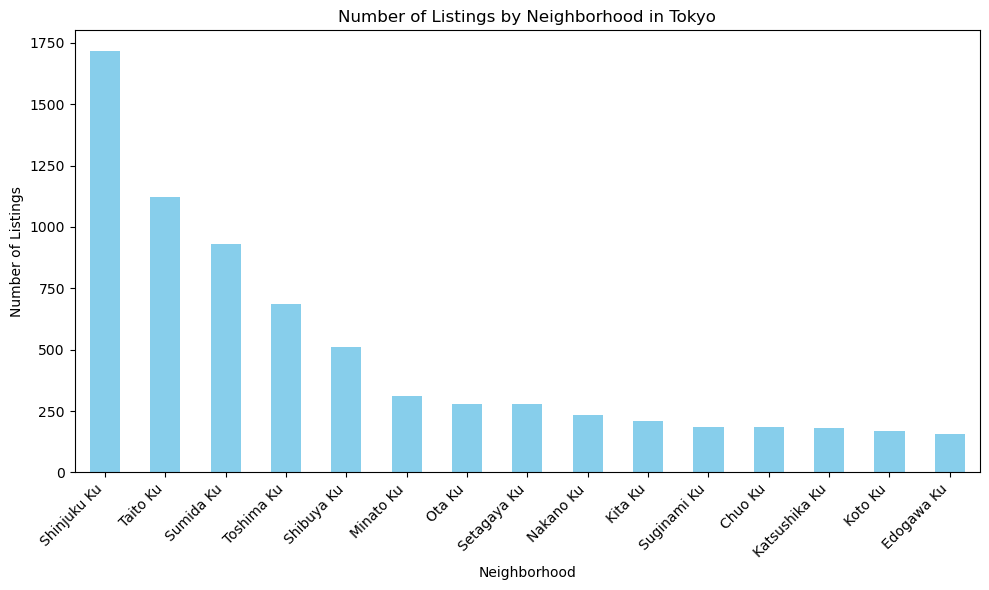

In [36]:
#Creating a Bar Chart based on the Neighborhood and number of listings.

#Creating a listing count of each neighborhood and sorting it into descending order with the top 15
neighborhood_counts = tokyo_df['neighbourhood'].value_counts()
neighborhood_counts_sorted = neighborhood_counts.sort_values(ascending=False)
top_neighborhoods = neighborhood_counts_sorted.head(15)

# Plotting a bar chart using MatPlotLib

plt.figure(figsize=(10, 6))
top_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Number of Listings by Neighborhood in Tokyo')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('static/barchart_of_neighborhoodlistings_in_tokyo.png', format='png')
plt.show()

In [13]:
# Read the saved PNG file and encode it to base64
with open('Resources/barchart_of_neighborhoodlistings_in_tokyo.png', 'rb') as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

# Create an HTML file with the base64 image
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Number of Listings by Neighborhood in Tokyo</title>
</head>
<body>
    <h1>Number of Listings by Neighborhood in Tokyo</h1>
    <img src="data:image/png;base64,{image_base64}" alt="Number of Listings by Neighborhood in Tokyo">
</body>
</html>
"""

# Write the HTML content to a file
with open("Resources/barchart_of_neighborhoodlistings_in_tokyo.html", "w") as html_file:
    html_file.write(html_content)

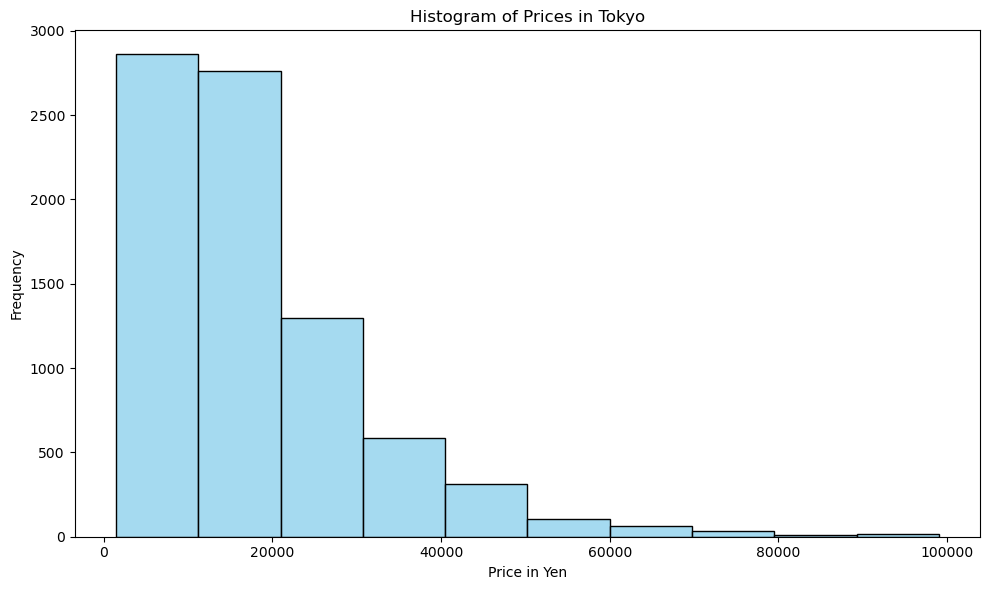

In [61]:
# Creating a Histogram to show the overall distribution of price
tokyo_df = tokyo_df[tokyo_df['price'] < 100000] 
## Using Matplotlib 
plt.figure(figsize=(10, 6))
sns.histplot(tokyo_df['price'], bins=10, color='skyblue', edgecolor='black', kde=False)
plt.title('Histogram of Prices in Tokyo')
plt.xlabel('Price in Yen')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Resources/histogram_of_prices_in_tokyo.png', format='png')
plt.show()

In [62]:
with open('Resources/histogram_of_prices_in_tokyo.png', 'rb') as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

# Creating an HTML file with the base64 image
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Histogram of Prices in Tokyo</title>
</head>
<body>
    <h1>Histogram of Prices in Tokyo</h1>
    <img src="data:image/png;base64,{image_base64}" alt="Histogram of Prices in Tokyo">
</body>
</html>
"""

# Writing the HTML content to a file
with open("Resources/histogram_of_prices_in_tokyo.html", "w") as html_file:
    html_file.write(html_content)

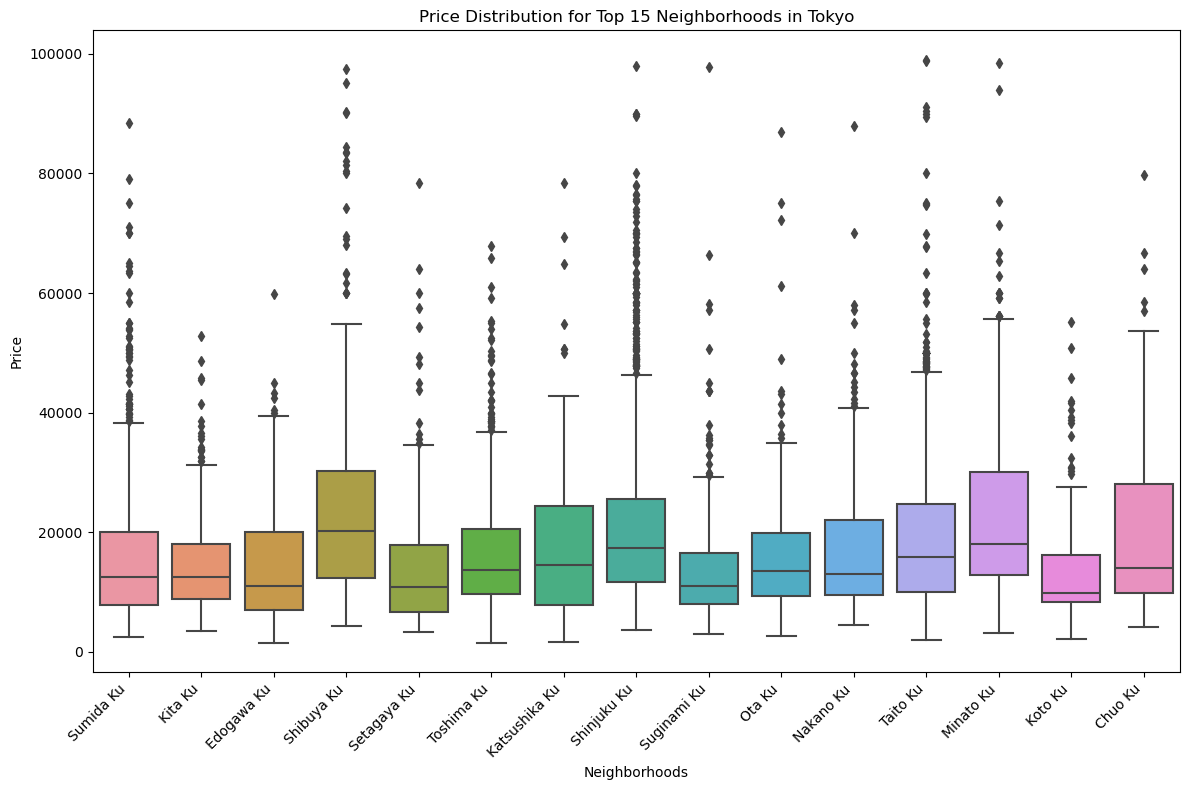

In [63]:
# Extract top 15 neighborhoods based on count and tokyo_df to only include top 15 neighborhoods
boxplot_top_neighborhoods = neighborhood_counts_sorted.head(15).index


tokyo_top_df = tokyo_df[tokyo_df['neighbourhood'].isin(boxplot_top_neighborhoods)]
tokyo_top_df.head()

#Create boxplot using seaborn for top 15 neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(data=tokyo_top_df, x='neighbourhood', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution for Top 15 Neighborhoods in Tokyo')
plt.xlabel('Neighborhoods')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig('Resources/price_distribution.png', format='png')
plt.show()


In [65]:
with open('Resources/price_distribution.png', 'rb') as image_file:
    image_base64 = base64.b64encode(image_file.read()).decode('utf-8')

# Creating an HTML file with the base64 image
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Price Distribution for Top 15 Neighborhoods in Tokyo</title>
</head>
<body>
    <h1>Price Distribution for Top 15 Neighborhoods in Tokyo</h1>
    <img src="data:image/png;base64,{image_base64}" alt="Price Distribution for Top 15 Neighborhoods in Tokyo">
</body>
</html>
"""

# Writing the HTML content to a file
with open("Resources/price_distribution.html", "w") as html_file:
    html_file.write(html_content)